<a href="https://colab.research.google.com/github/codewithMAyank/DSA/blob/main/Brain_Tumor_Classification%20uisng%20transfer%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 90% 133M/149M [00:00<00:00, 200MB/s]
100% 149M/149M [00:01<00:00, 147MB/s]


In [4]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [5]:
tr_df = get_class_paths("/content/Training")


In [6]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_1386.jpg,notumor
1,/content/Training/notumor/Tr-no_1555.jpg,notumor
2,/content/Training/notumor/Tr-no_0557.jpg,notumor
3,/content/Training/notumor/Tr-no_1484.jpg,notumor
4,/content/Training/notumor/Tr-no_1394.jpg,notumor
...,...,...
5707,/content/Training/meningioma/Tr-me_0789.jpg,meningioma
5708,/content/Training/meningioma/Tr-me_0277.jpg,meningioma
5709,/content/Training/meningioma/Tr-me_0688.jpg,meningioma
5710,/content/Training/meningioma/Tr-me_0709.jpg,meningioma


In [7]:
tr_df.head()

,Class Path,Class
0,/content/Training/notumor/Tr-no_1386.jpg,notumor
1,/content/Training/notumor/Tr-no_1555.jpg,notumor
2,/content/Training/notumor/Tr-no_0557.jpg,notumor
3,/content/Training/notumor/Tr-no_1484.jpg,notumor
4,/content/Training/notumor/Tr-no_1394.jpg,notumor


In [8]:
ts_df = get_class_paths("/content/Testing")

In [9]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0324.jpg,notumor
1,/content/Testing/notumor/Te-no_0400.jpg,notumor
2,/content/Testing/notumor/Te-no_0225.jpg,notumor
3,/content/Testing/notumor/Te-no_0155.jpg,notumor
4,/content/Testing/notumor/Te-no_0297.jpg,notumor
...,...,...
1306,/content/Testing/meningioma/Te-me_0252.jpg,meningioma
1307,/content/Testing/meningioma/Te-me_0251.jpg,meningioma
1308,/content/Testing/meningioma/Te-me_0291.jpg,meningioma
1309,/content/Testing/meningioma/Te-meTr_0005.jpg,meningioma


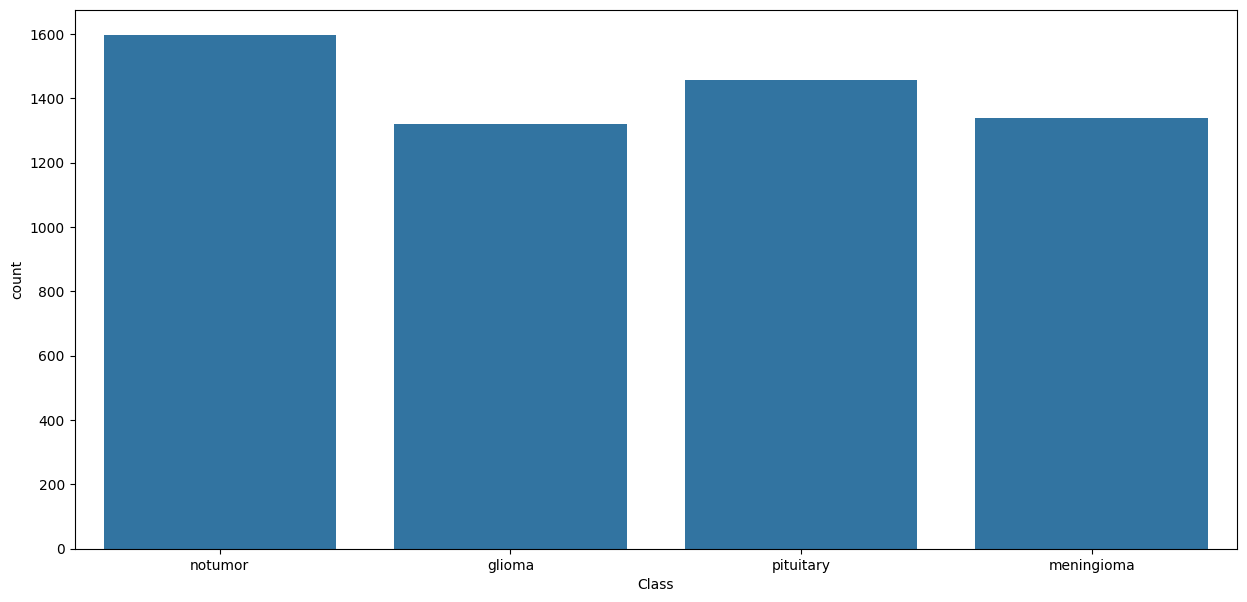

In [10]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

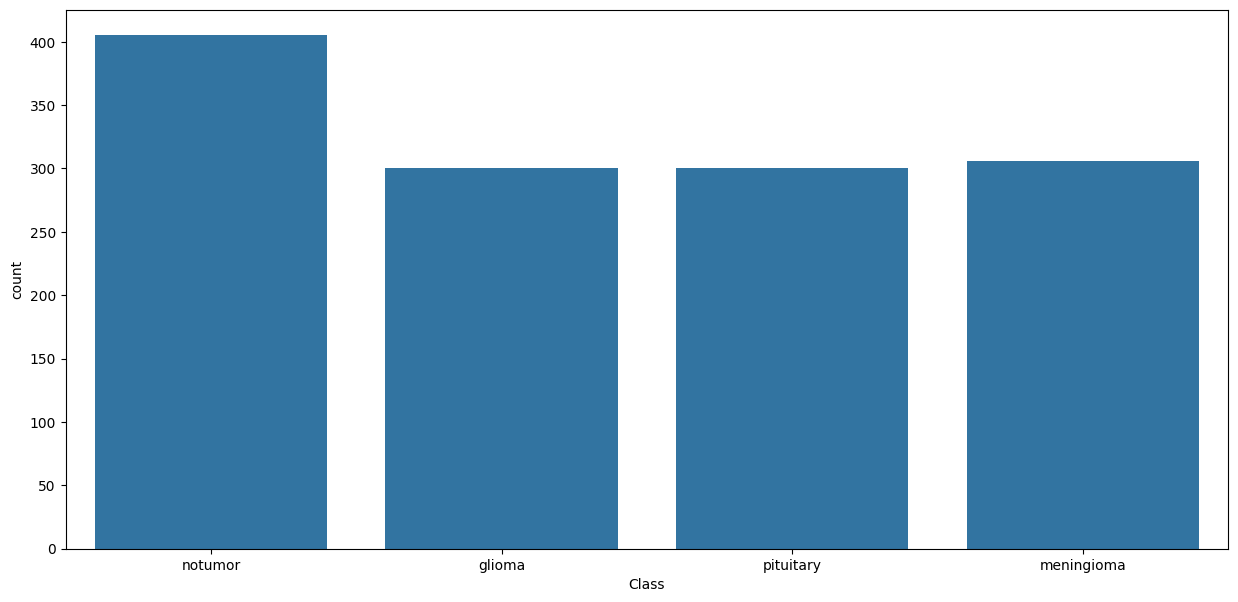

In [11]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.src.layers import Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [14]:
valid_df

,Class Path,Class
1161,/content/Testing/meningioma/Te-me_0116.jpg,meningioma
308,/content/Testing/notumor/Te-no_0341.jpg,notumor
631,/content/Testing/glioma/Te-gl_0294.jpg,glioma
722,/content/Testing/pituitary/Te-pi_0060.jpg,pituitary
612,/content/Testing/glioma/Te-gl_0236.jpg,glioma
...,...,...
1080,/content/Testing/meningioma/Te-me_0017.jpg,meningioma
134,/content/Testing/notumor/Te-no_0052.jpg,notumor
599,/content/Testing/glioma/Te-gl_0134.jpg,glioma
203,/content/Testing/notumor/Te-no_0138.jpg,notumor


In [15]:
ts_df

,Class Path,Class
1264,/content/Testing/meningioma/Te-me_0083.jpg,meningioma
59,/content/Testing/notumor/Te-no_0027.jpg,notumor
1110,/content/Testing/meningioma/Te-me_0038.jpg,meningioma
1145,/content/Testing/meningioma/Te-meTr_0007.jpg,meningioma
30,/content/Testing/notumor/Te-no_0321.jpg,notumor
...,...,...
850,/content/Testing/pituitary/Te-pi_0103.jpg,pituitary
830,/content/Testing/pituitary/Te-pi_0296.jpg,pituitary
950,/content/Testing/pituitary/Te-pi_0036.jpg,pituitary
257,/content/Testing/notumor/Te-no_0147.jpg,notumor


In [16]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [17]:
print(tr_df.columns)

Index(['Class Path', 'Class'], dtype='object')


In [18]:
tr_gen = image_generator.flow_from_dataframe(tr_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

valid_gen = image_generator.flow_from_dataframe(valid_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=16,
  target_size=img_size,
  shuffle=False,
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


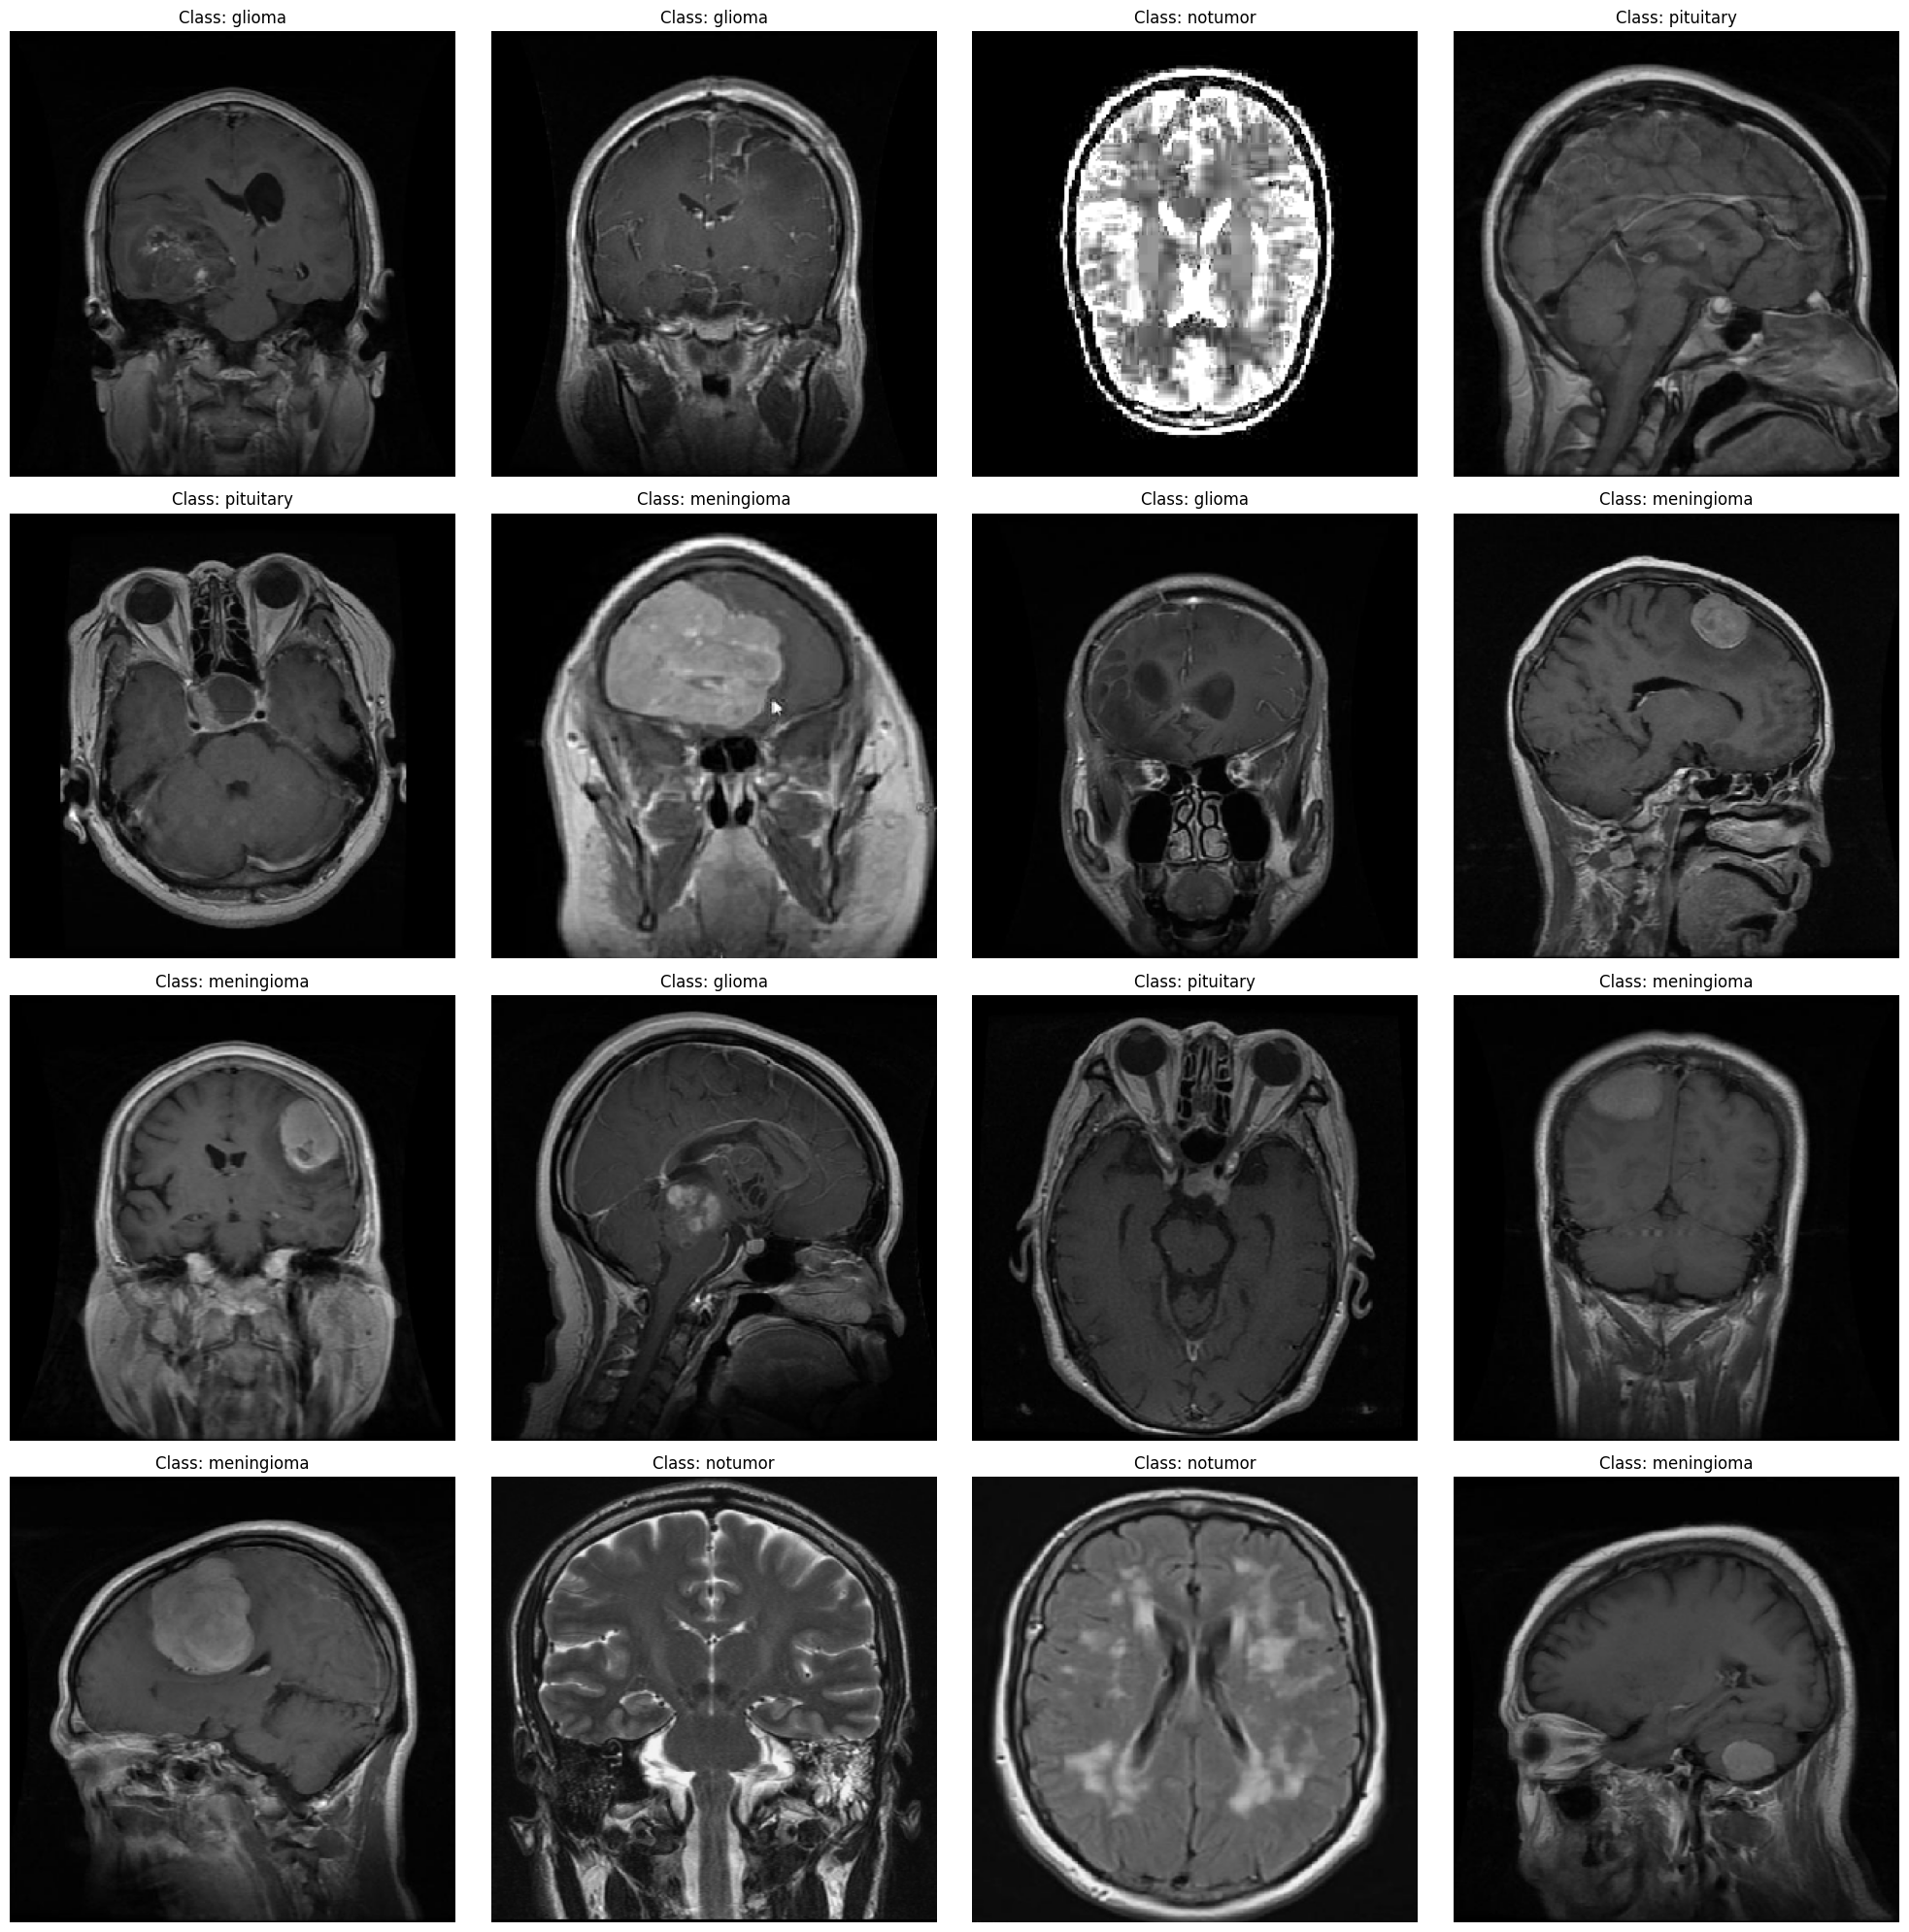

In [19]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  class_indicies = list(tr_gen.class_indices.values())

  index_position = class_indicies.index(class_index)

  class_name = class_names[index_position]

  plt.title(f'Class: {class_name}')
  plt.axis("off")

plt.tight_layout()
plt.show()

In [20]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [21]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling="max")

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(rate=0.25),
    Dense(4, activation="softmax")
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
model.compile(Adamax(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy", Precision(), Recall()])

In [23]:
hist = model.fit(tr_gen,
                 epochs=5,
                 validation_data=valid_gen,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.7015 - loss: 0.8459 - precision: 0.7974 - recall: 0.5730 - val_accuracy: 0.9176 - val_loss: 0.2145 - val_precision: 0.9201 - val_recall: 0.9145
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 147s 820ms/step - accuracy: 0.9762 - loss: 0.0751 - precision: 0.9778 - recall: 0.9747 - val_accuracy: 0.9740 - val_loss: 0.0650 - val_precision: 0.9800 - val_recall: 0.9710
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 841ms/step - accuracy: 0.9918 - loss: 0.0321 - precision: 0.9921 - recall: 0.9907 - val_accuracy: 0.9908 - val_loss: 0.0244 - val_precision: 0.9924 - val_recall: 0.9908
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 839ms/step - accuracy: 0.9970 - loss: 0.0141 - precision: 0.9971 - recall: 0.9968 - val_accuracy: 0.9863 - val_loss: 0.0512 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 836ms/step - accuracy: 0.9955 - loss: 0.0127 - precision: 0.9957 - recall: 0.9955 - val_accuracy: 0.9878 - 

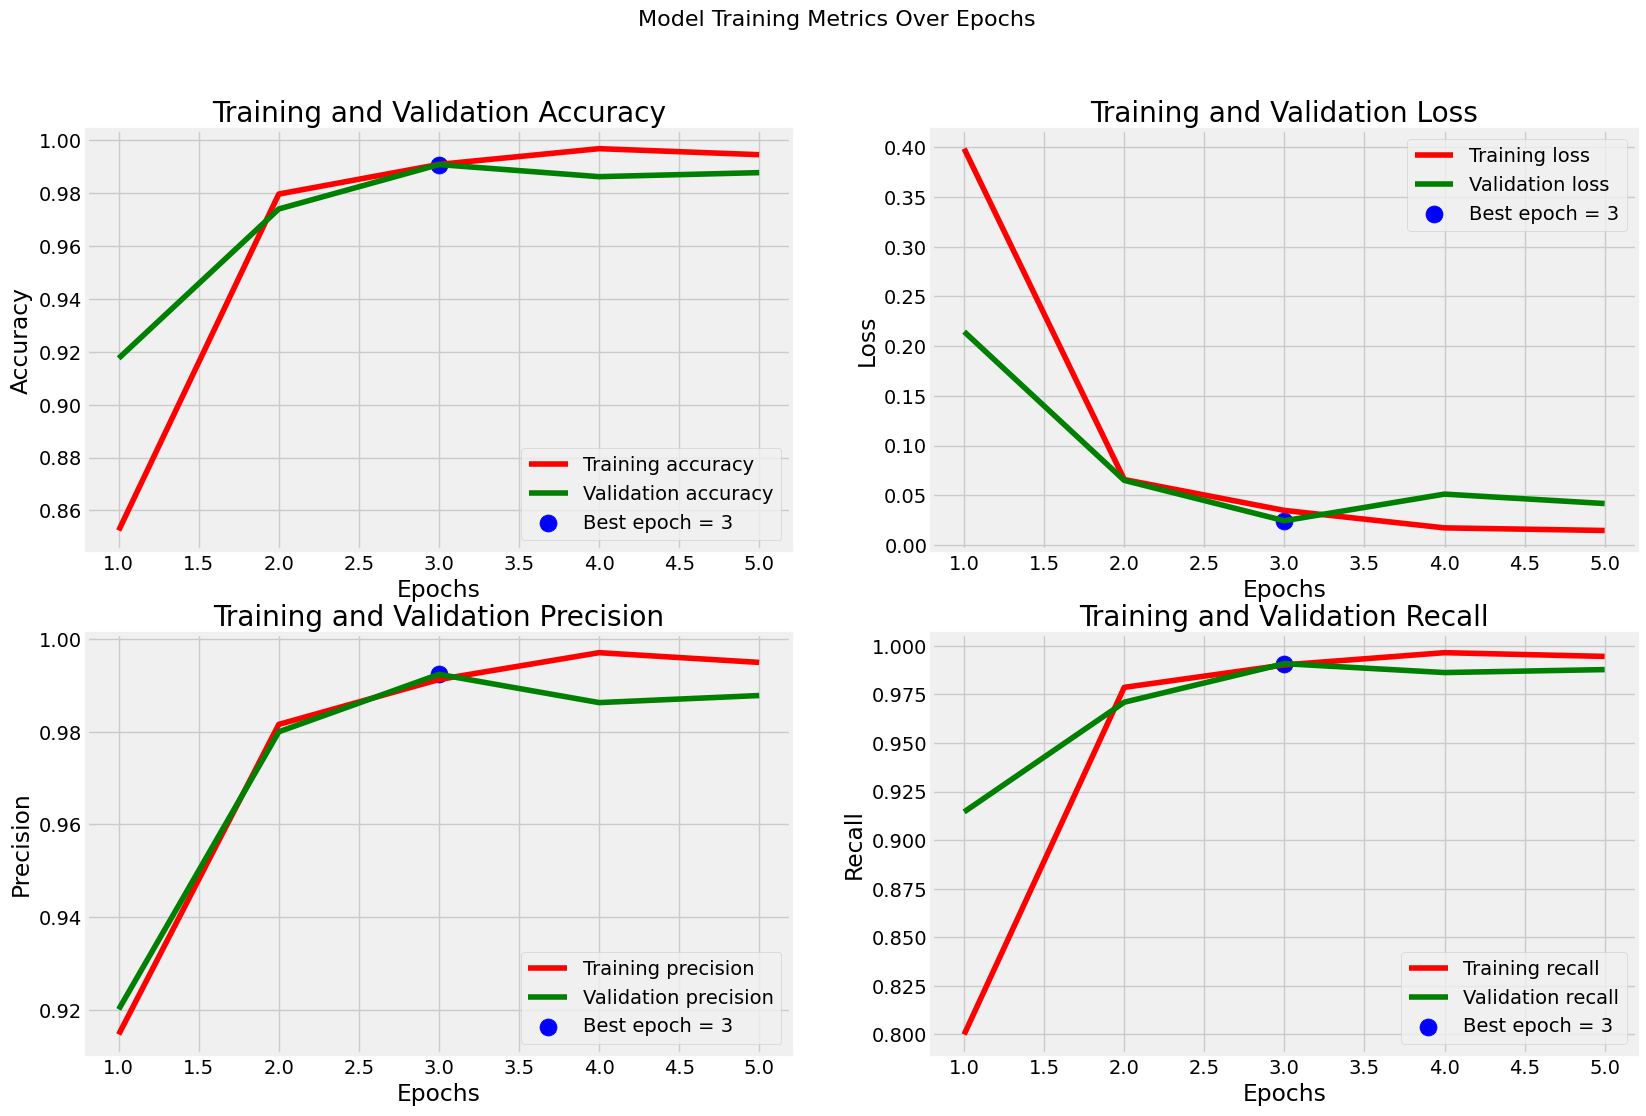

In [24]:
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f"val_{m}"] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])

    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150,c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [25]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 223ms/step - accuracy: 0.9995 - loss: 0.0018 - precision: 0.9995 - recall: 0.9995
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.9907 - loss: 0.0338 - precision: 0.9907 - recall: 0.9907


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9931 - loss: 0.0239 - precision: 0.9931 - recall: 0.9931
Train Accuracy: 99.95%
Train Loss: 0.0018

Validation Accuracy: 98.63%
Validation Loss: 0.0526


Test Accuracy: 99.24%
Test Loss: 0.0246


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step


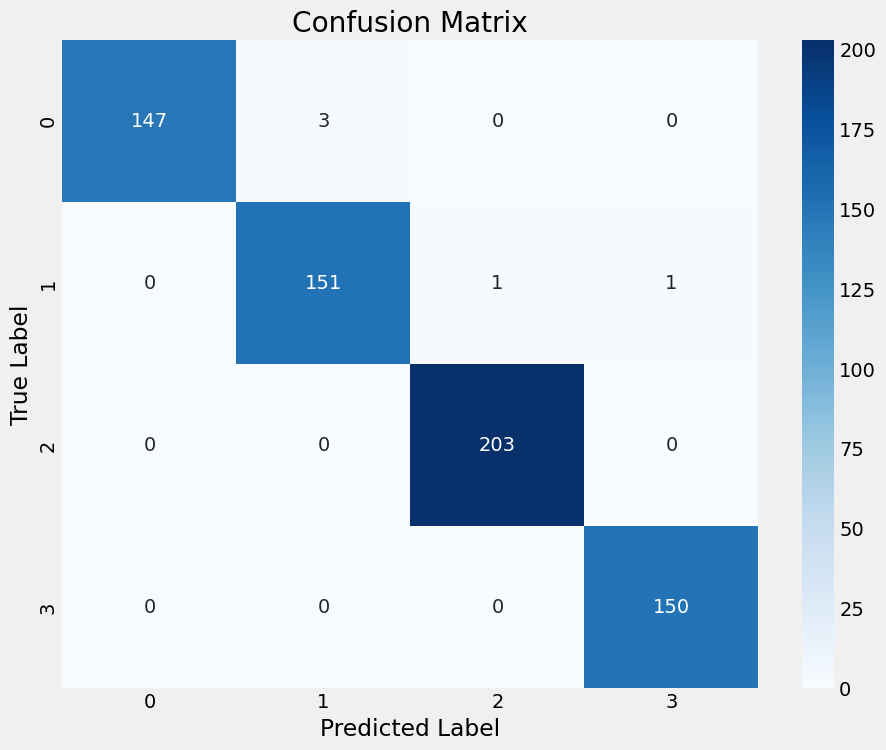

In [26]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from PIL import Image

def predict(img_path: str) -> str:
    labels = list(class_dict.keys())
    plt.figure(figsize=(6, 8))

    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel('Probability', fontsize=15)
    plt.title('Class Probabilities')

    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted Tumor Type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


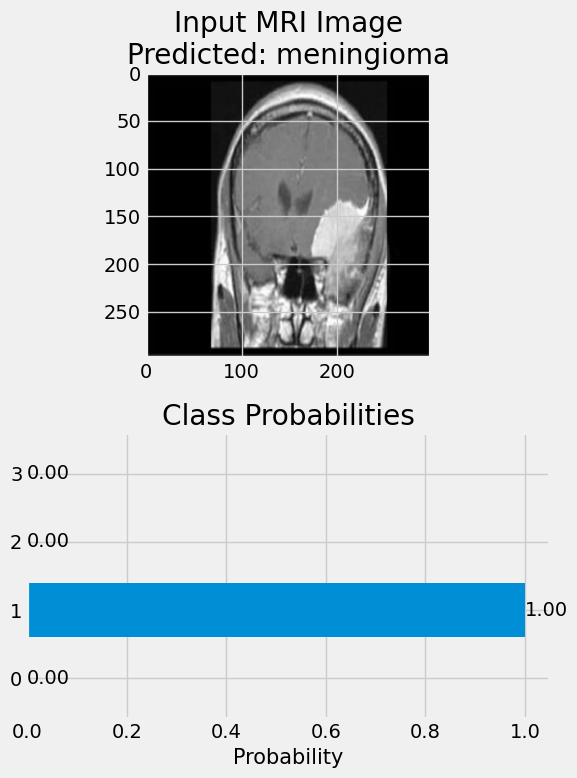


Predicted Tumor Type: meningioma


In [28]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


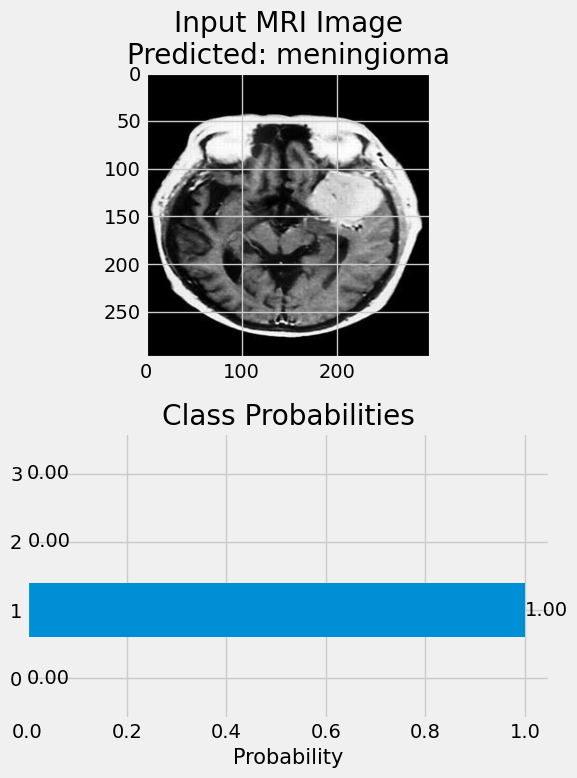


Predicted Tumor Type: meningioma


In [29]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


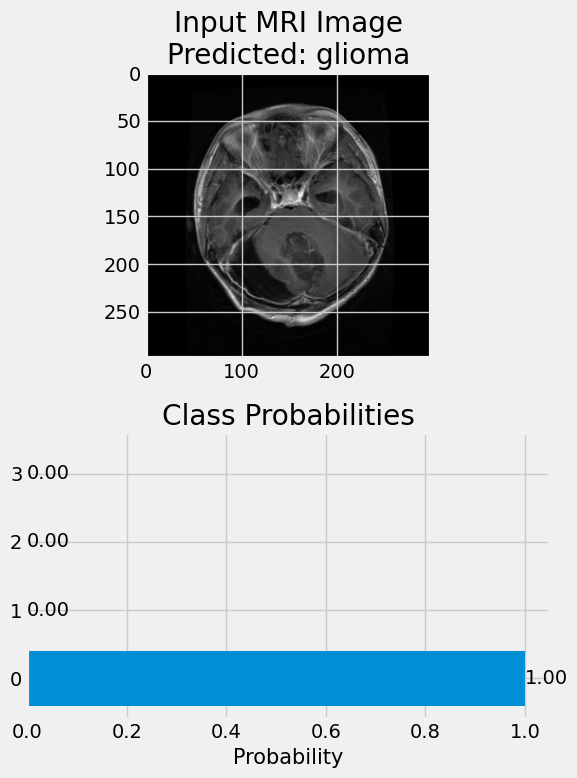


Predicted Tumor Type: glioma


In [30]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


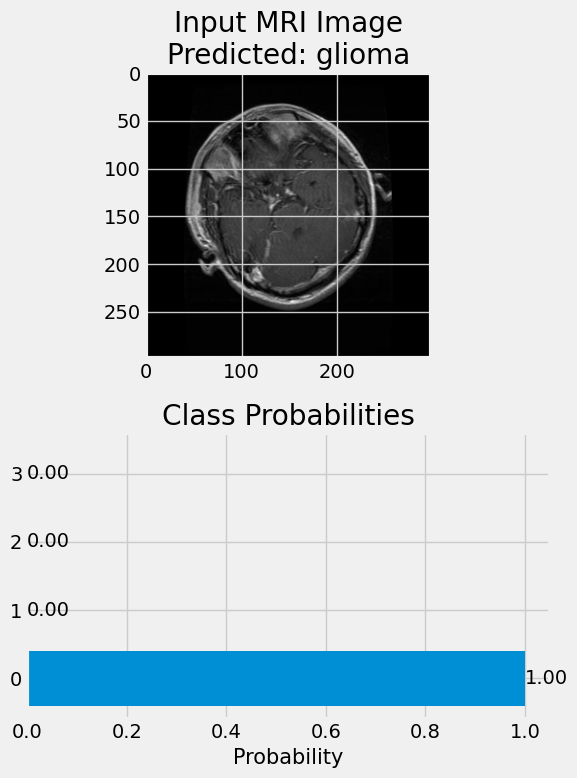


Predicted Tumor Type: glioma


In [31]:
predict("/content/Testing/glioma/Te-glTr_0006.jpg")

In [32]:
model.save_weights("xception_model.weights.h5")